# feature selection


In [1]:
%%time
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE,RandomOverSampler
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from itertools import combinations 
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection


Using TensorFlow backend.
/home/sf/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sf/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sf/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sf/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtype

CPU times: user 2.46 s, sys: 700 ms, total: 3.16 s
Wall time: 28.3 s


In [2]:
df=pd.read_csv('60s_window_wrist_chest.csv',index_col=0)


features=df.columns.tolist()
features

removed = ['label']
for rem in removed:
    features.remove(rem)

features_with_sub=[]
features_with_sub[:]=features
removed = ['subject']
for rem in removed:
    features.remove(rem)

feature=features
print(len(feature))
len(features_with_sub)


sm = SMOTE(random_state=2)
X, y= sm.fit_sample(df[features_with_sub], df['label'])
df_new=pd.concat([pd.DataFrame(X,columns=features_with_sub),pd.DataFrame(y,columns=['label'])],axis=1)
df_new

for i in range (len(list(df_new['subject']))):
    df_new['subject'][i] = min([2,3,4,5,6,7,8,9,10,11,13,14,15,16,17], key=lambda x:abs(x-df_new['subject'][i]))
df_new['subject']=df_new['subject'].astype(int)

p_d=pd.read_csv('personal_detail.csv',index_col=0)

df_new_1=df_new.merge(p_d,on='subject')
df_new_1

features=df_new_1.columns.tolist()
features

removed = ['label']
for rem in removed:
    features.remove(rem)
features_with_sub=[]
features_with_sub[:]=features
removed = ['subject']
for rem in removed:
    features.remove(rem)

feature=features
print(len(feature))
len(features_with_sub)

70


/home/sf/.local/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


79


80

In [3]:
df_new_1

,net_acc_mean,net_acc_std,net_acc_min,net_acc_max,ACC_x_mean,ACC_x_std,ACC_x_min,ACC_x_max,ACC_y_mean,ACC_y_std,...,label,age,height,weight,gender_ female,coffee_today_YES,sport_today_YES,smoker_YES,feel_ill_today_YES,bmi
0,0.025961,0.013811,0.000000,0.087383,0.023431,0.017769,-0.037843,0.087383,0.000016,1.222594e-05,...,0,27,175,80,0,0,0,0,0,1
1,0.027640,0.010597,0.002752,0.054356,0.027640,0.010597,0.002752,0.054356,0.000019,7.290999e-06,...,0,27,175,80,0,0,0,0,0,1
2,0.028389,0.006937,0.000000,0.066053,0.028378,0.006985,-0.002752,0.066053,0.000020,4.805734e-06,...,0,27,175,80,0,0,0,0,0,1
3,0.033268,0.007670,0.000000,0.074998,0.032960,0.008904,-0.030962,0.074998,0.000023,6.126303e-06,...,0,27,175,80,0,0,0,0,0,1
4,0.037021,0.001284,0.027522,0.043347,0.037021,0.001284,0.027522,0.043347,0.000025,8.837530e-07,...,0,27,175,80,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,0.029484,0.002074,0.020918,0.053804,-0.004624,0.002074,-0.015439,0.017447,-0.000003,1.427082e-06,...,1,29,165,55,1,0,0,0,0,0
1244,0.032744,0.000516,0.029211,0.034857,-0.029334,0.000516,-0.031478,-0.025832,-0.000020,3.552867e-07,...,2,29,165,55,1,0,0,0,0,0
1245,0.030006,0.007051,0.002966,0.070357,-0.027424,0.007051,-0.067796,-0.000404,-0.000019,4.851210e-06,...,2,29,165,55,1,0,0,0,0,0
1246,0.031250,0.001534,0.027188,0.038575,-0.031250,0.001534,-0.038575,-0.027188,-0.000022,1.055452e-06,...,2,29,165,55,1,0,0,0,0,0


## 4 class

In [78]:
train=df_new_1[df_new_1['subject']<=9]
test=df_new_1[df_new_1['subject']>9]

In [79]:
scaler = Normalizer()
scaled_data_train = scaler.fit_transform(train[feature])
scaled_data_test = scaler.transform(test[feature])

et = ExtraTreesClassifier(n_estimators=100,n_jobs=10,random_state=56)
et.fit(scaled_data_train,train['label'])
y_pred=et.predict(scaled_data_test)
print(classification_report(test['label'],y_pred))

In [31]:
d=[]
for i in range(len(feature)):
     d.append([feature[i],list(et.feature_importances_)[i]*100])
d.sort(key=lambda x: x[1])
d

[['ACC_y_std', 0.0],
 ['ACC_z_std', 0.0],
 ['EDA_smna_min', 0.0],
 ['smoker_YES', 0.35926809389201736],
 ['BVP_mean', 0.3715718871751929],
 ['gender_ female', 0.3891733112006235],
 ['bmi', 0.4424305391239755],
 ['ACC_y_max', 0.503485857594942],
 ['ACC_y_min', 0.5045322775178077],
 ['ACC_z_min', 0.6297372723633826],
 ['c_ACC_x_min', 0.6615906209489002],
 ['Resp_mean', 0.6646232142323656],
 ['coffee_today_YES', 0.6686427175251872],
 ['ACC_z_mean', 0.67593309185163],
 ['ECG_mean', 0.7115604759955233],
 ['ACC_y_mean', 0.7142481690072271],
 ['sport_today_YES', 0.7332283369528014],
 ['c_ACC_z_std', 0.7564623718730891],
 ['c_Temp_std', 0.7588110550001993],
 ['ECG_std', 0.7675586065855474],
 ['feel_ill_today_YES', 0.7829618182245967],
 ['ACC_z_max', 0.8103755654454617],
 ['ECG_max', 0.8498394607104357],
 ['TEMP_min', 0.8592659641963167],
 ['weight', 0.8595848916663413],
 ['c_ACC_x_std', 0.8631160928960235],
 ['EDA_tonic_std', 0.8964292654952796],
 ['c_ACC_x_mean', 0.8998566424063473],
 ['c_ACC

Current size: [15.0, 10.0]


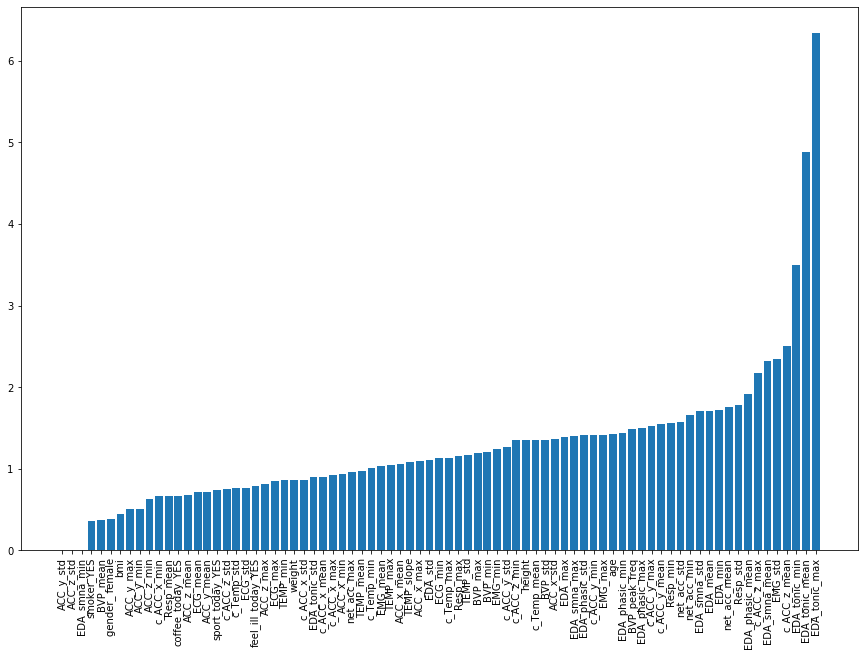

<Figure size 360x1080 with 0 Axes>

In [33]:
names = []
values = []
for i in d:
    names.append(i[0])
    values.append(i[1])
plt.bar(names, values)
plt.xticks(rotation=90)
plt.figure(figsize=(5,15))
fig_size = plt.rcParams["figure.figsize"]
print ("Current size:", fig_size)
fig_size[0] = 15
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

In [44]:
imp_feature=[]
for i in d:
    imp_feature.append((i[0]))
imp_feature

['ACC_y_std',
 'ACC_z_std',
 'EDA_smna_min',
 'smoker_YES',
 'BVP_mean',
 'gender_ female',
 'bmi',
 'ACC_y_max',
 'ACC_y_min',
 'ACC_z_min',
 'c_ACC_x_min',
 'Resp_mean',
 'coffee_today_YES',
 'ACC_z_mean',
 'ECG_mean',
 'ACC_y_mean',
 'sport_today_YES',
 'c_ACC_z_std',
 'c_Temp_std',
 'ECG_std',
 'feel_ill_today_YES',
 'ACC_z_max',
 'ECG_max',
 'TEMP_min',
 'weight',
 'c_ACC_x_std',
 'EDA_tonic_std',
 'c_ACC_x_mean',
 'c_ACC_x_max',
 'ACC_x_min',
 'net_acc_max',
 'TEMP_mean',
 'c_Temp_min',
 'EMG_mean',
 'TEMP_max',
 'ACC_x_mean',
 'TEMP_slope',
 'ACC_x_max',
 'EDA_std',
 'ECG_min',
 'c_Temp_max',
 'Resp_max',
 'TEMP_std',
 'BVP_max',
 'BVP_min',
 'EMG_min',
 'c_ACC_y_std',
 'c_ACC_z_min',
 'height',
 'c_Temp_mean',
 'BVP_std',
 'ACC_x_std',
 'EDA_max',
 'EDA_smna_max',
 'EDA_phasic_std',
 'c_ACC_y_min',
 'EMG_max',
 'age',
 'EDA_phasic_min',
 'BVP_peak_freq',
 'EDA_phasic_max',
 'c_ACC_y_max',
 'c_ACC_y_mean',
 'Resp_min',
 'net_acc_std',
 'net_acc_min',
 'EDA_smna_std',
 'EDA_mean'

52


['EDA_tonic_max',
 'EDA_tonic_mean',
 'EDA_tonic_min',
 'c_ACC_z_mean',
 'EMG_std',
 'EDA_smna_mean',
 'c_ACC_z_max',
 'EDA_phasic_mean',
 'Resp_std',
 'net_acc_mean',
 'EDA_min',
 'EDA_mean',
 'EDA_smna_std',
 'net_acc_min',
 'net_acc_std',
 'Resp_min',
 'c_ACC_y_mean',
 'c_ACC_y_max',
 'EDA_phasic_max',
 'BVP_peak_freq',
 'EDA_phasic_min',
 'age',
 'EMG_max',
 'c_ACC_y_min',
 'EDA_phasic_std',
 'EDA_smna_max',
 'EDA_max',
 'ACC_x_std',
 'BVP_std',
 'c_Temp_mean',
 'height',
 'c_ACC_z_min',
 'c_ACC_y_std',
 'EMG_min',
 'BVP_min',
 'BVP_max',
 'TEMP_std',
 'Resp_max',
 'c_Temp_max',
 'ECG_min',
 'EDA_std',
 'ACC_x_max',
 'TEMP_slope',
 'ACC_x_mean',
 'TEMP_max',
 'EMG_mean',
 'c_Temp_min',
 'TEMP_mean',
 'net_acc_max',
 'ACC_x_min',
 'c_ACC_x_max',
 'c_ACC_x_mean']

In [146]:
for i in range(len(imp_feature)):
    print(i+1)
    new_fea=[]
    new_fea=imp_feature[::-1][:i+1]#[i for i in feature if ('EDA'in i) or ('acc' in i)or ('std' in i)]
    print((new_fea))
    scaler = Normalizer()
    scaled_data_train = scaler.fit_transform(train[new_fea])
    scaled_data_test = scaler.transform(test[new_fea])


    et = ExtraTreesClassifier(n_estimators=100,n_jobs=10,random_state=56)
    et.fit(scaled_data_train,train['label'])
    y_pred=et.predict(scaled_data_test)
    print(classification_report(test['label'],y_pred))


1
['EDA_tonic_max']


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       147
           1       0.72      0.83      0.77       161
           2       0.32      0.92      0.48       146
           3       0.00      0.00      0.00       149

    accuracy                           0.44       603
   macro avg       0.26      0.44      0.31       603
weighted avg       0.27      0.44      0.32       603

2
['EDA_tonic_max', 'EDA_tonic_mean']
              precision    recall  f1-score   support

           0       0.29      0.29      0.29       147
           1       0.74      0.69      0.72       161
           2       0.27      0.24      0.26       146
           3       0.34      0.40      0.37       149

    accuracy                           0.41       603
   macro avg       0.41      0.41      0.41       603
weighted avg       0.42      0.41      0.41       603

3
['EDA_tonic_max', 'EDA_tonic_mean', 'EDA_tonic_min']
              precision    recall  f1

              precision    recall  f1-score   support

           0       0.70      0.48      0.57       147
           1       0.82      0.81      0.82       161
           2       0.47      0.62      0.53       146
           3       0.70      0.71      0.70       149

    accuracy                           0.66       603
   macro avg       0.67      0.65      0.66       603
weighted avg       0.68      0.66      0.66       603

17
['EDA_tonic_max', 'EDA_tonic_mean', 'EDA_tonic_min', 'c_ACC_z_mean', 'EMG_std', 'EDA_smna_mean', 'c_ACC_z_max', 'EDA_phasic_mean', 'Resp_std', 'net_acc_mean', 'EDA_min', 'EDA_mean', 'EDA_smna_std', 'net_acc_min', 'net_acc_std', 'Resp_min', 'c_ACC_y_mean']
              precision    recall  f1-score   support

           0       0.80      0.48      0.60       147
           1       0.84      0.86      0.85       161
           2       0.47      0.64      0.54       146
           3       0.68      0.67      0.68       149

    accuracy                      

              precision    recall  f1-score   support

           0       0.83      0.53      0.65       147
           1       0.82      0.84      0.83       161
           2       0.50      0.73      0.60       146
           3       0.70      0.62      0.65       149

    accuracy                           0.68       603
   macro avg       0.71      0.68      0.68       603
weighted avg       0.72      0.68      0.69       603

28
['EDA_tonic_max', 'EDA_tonic_mean', 'EDA_tonic_min', 'c_ACC_z_mean', 'EMG_std', 'EDA_smna_mean', 'c_ACC_z_max', 'EDA_phasic_mean', 'Resp_std', 'net_acc_mean', 'EDA_min', 'EDA_mean', 'EDA_smna_std', 'net_acc_min', 'net_acc_std', 'Resp_min', 'c_ACC_y_mean', 'c_ACC_y_max', 'EDA_phasic_max', 'BVP_peak_freq', 'EDA_phasic_min', 'age', 'EMG_max', 'c_ACC_y_min', 'EDA_phasic_std', 'EDA_smna_max', 'EDA_max', 'ACC_x_std']
              precision    recall  f1-score   support

           0       0.87      0.46      0.60       147
           1       0.80      0.86     

              precision    recall  f1-score   support

           0       0.81      0.55      0.66       147
           1       0.86      0.89      0.87       161
           2       0.61      0.77      0.68       146
           3       0.66      0.68      0.67       149

    accuracy                           0.72       603
   macro avg       0.74      0.72      0.72       603
weighted avg       0.74      0.72      0.72       603

38
['EDA_tonic_max', 'EDA_tonic_mean', 'EDA_tonic_min', 'c_ACC_z_mean', 'EMG_std', 'EDA_smna_mean', 'c_ACC_z_max', 'EDA_phasic_mean', 'Resp_std', 'net_acc_mean', 'EDA_min', 'EDA_mean', 'EDA_smna_std', 'net_acc_min', 'net_acc_std', 'Resp_min', 'c_ACC_y_mean', 'c_ACC_y_max', 'EDA_phasic_max', 'BVP_peak_freq', 'EDA_phasic_min', 'age', 'EMG_max', 'c_ACC_y_min', 'EDA_phasic_std', 'EDA_smna_max', 'EDA_max', 'ACC_x_std', 'BVP_std', 'c_Temp_mean', 'height', 'c_ACC_z_min', 'c_ACC_y_std', 'EMG_min', 'BVP_min', 'BVP_max', 'TEMP_std', 'Resp_max']
              precision 

              precision    recall  f1-score   support

           0       0.78      0.60      0.68       147
           1       0.90      0.87      0.89       161
           2       0.55      0.71      0.62       146
           3       0.62      0.62      0.62       149

    accuracy                           0.70       603
   macro avg       0.71      0.70      0.70       603
weighted avg       0.72      0.70      0.71       603

47
['EDA_tonic_max', 'EDA_tonic_mean', 'EDA_tonic_min', 'c_ACC_z_mean', 'EMG_std', 'EDA_smna_mean', 'c_ACC_z_max', 'EDA_phasic_mean', 'Resp_std', 'net_acc_mean', 'EDA_min', 'EDA_mean', 'EDA_smna_std', 'net_acc_min', 'net_acc_std', 'Resp_min', 'c_ACC_y_mean', 'c_ACC_y_max', 'EDA_phasic_max', 'BVP_peak_freq', 'EDA_phasic_min', 'age', 'EMG_max', 'c_ACC_y_min', 'EDA_phasic_std', 'EDA_smna_max', 'EDA_max', 'ACC_x_std', 'BVP_std', 'c_Temp_mean', 'height', 'c_ACC_z_min', 'c_ACC_y_std', 'EMG_min', 'BVP_min', 'BVP_max', 'TEMP_std', 'Resp_max', 'c_Temp_max', 'ECG_min',

              precision    recall  f1-score   support

           0       0.75      0.50      0.60       147
           1       0.84      0.90      0.87       161
           2       0.53      0.73      0.61       146
           3       0.68      0.62      0.65       149

    accuracy                           0.69       603
   macro avg       0.70      0.69      0.68       603
weighted avg       0.71      0.69      0.69       603

55
['EDA_tonic_max', 'EDA_tonic_mean', 'EDA_tonic_min', 'c_ACC_z_mean', 'EMG_std', 'EDA_smna_mean', 'c_ACC_z_max', 'EDA_phasic_mean', 'Resp_std', 'net_acc_mean', 'EDA_min', 'EDA_mean', 'EDA_smna_std', 'net_acc_min', 'net_acc_std', 'Resp_min', 'c_ACC_y_mean', 'c_ACC_y_max', 'EDA_phasic_max', 'BVP_peak_freq', 'EDA_phasic_min', 'age', 'EMG_max', 'c_ACC_y_min', 'EDA_phasic_std', 'EDA_smna_max', 'EDA_max', 'ACC_x_std', 'BVP_std', 'c_Temp_mean', 'height', 'c_ACC_z_min', 'c_ACC_y_std', 'EMG_min', 'BVP_min', 'BVP_max', 'TEMP_std', 'Resp_max', 'c_Temp_max', 'ECG_min',

              precision    recall  f1-score   support

           0       0.84      0.59      0.69       147
           1       0.90      0.89      0.90       161
           2       0.60      0.79      0.68       146
           3       0.69      0.68      0.69       149

    accuracy                           0.74       603
   macro avg       0.76      0.74      0.74       603
weighted avg       0.76      0.74      0.74       603

62
['EDA_tonic_max', 'EDA_tonic_mean', 'EDA_tonic_min', 'c_ACC_z_mean', 'EMG_std', 'EDA_smna_mean', 'c_ACC_z_max', 'EDA_phasic_mean', 'Resp_std', 'net_acc_mean', 'EDA_min', 'EDA_mean', 'EDA_smna_std', 'net_acc_min', 'net_acc_std', 'Resp_min', 'c_ACC_y_mean', 'c_ACC_y_max', 'EDA_phasic_max', 'BVP_peak_freq', 'EDA_phasic_min', 'age', 'EMG_max', 'c_ACC_y_min', 'EDA_phasic_std', 'EDA_smna_max', 'EDA_max', 'ACC_x_std', 'BVP_std', 'c_Temp_mean', 'height', 'c_ACC_z_min', 'c_ACC_y_std', 'EMG_min', 'BVP_min', 'BVP_max', 'TEMP_std', 'Resp_max', 'c_Temp_max', 'ECG_min',

              precision    recall  f1-score   support

           0       0.83      0.56      0.67       147
           1       0.87      0.89      0.88       161
           2       0.58      0.73      0.65       146
           3       0.67      0.68      0.68       149

    accuracy                           0.72       603
   macro avg       0.74      0.72      0.72       603
weighted avg       0.74      0.72      0.72       603

69
['EDA_tonic_max', 'EDA_tonic_mean', 'EDA_tonic_min', 'c_ACC_z_mean', 'EMG_std', 'EDA_smna_mean', 'c_ACC_z_max', 'EDA_phasic_mean', 'Resp_std', 'net_acc_mean', 'EDA_min', 'EDA_mean', 'EDA_smna_std', 'net_acc_min', 'net_acc_std', 'Resp_min', 'c_ACC_y_mean', 'c_ACC_y_max', 'EDA_phasic_max', 'BVP_peak_freq', 'EDA_phasic_min', 'age', 'EMG_max', 'c_ACC_y_min', 'EDA_phasic_std', 'EDA_smna_max', 'EDA_max', 'ACC_x_std', 'BVP_std', 'c_Temp_mean', 'height', 'c_ACC_z_min', 'c_ACC_y_std', 'EMG_min', 'BVP_min', 'BVP_max', 'TEMP_std', 'Resp_max', 'c_Temp_max', 'ECG_min',

              precision    recall  f1-score   support

           0       0.75      0.52      0.61       147
           1       0.85      0.90      0.88       161
           2       0.57      0.64      0.61       146
           3       0.66      0.74      0.70       149

    accuracy                           0.71       603
   macro avg       0.71      0.70      0.70       603
weighted avg       0.71      0.71      0.70       603

75
['EDA_tonic_max', 'EDA_tonic_mean', 'EDA_tonic_min', 'c_ACC_z_mean', 'EMG_std', 'EDA_smna_mean', 'c_ACC_z_max', 'EDA_phasic_mean', 'Resp_std', 'net_acc_mean', 'EDA_min', 'EDA_mean', 'EDA_smna_std', 'net_acc_min', 'net_acc_std', 'Resp_min', 'c_ACC_y_mean', 'c_ACC_y_max', 'EDA_phasic_max', 'BVP_peak_freq', 'EDA_phasic_min', 'age', 'EMG_max', 'c_ACC_y_min', 'EDA_phasic_std', 'EDA_smna_max', 'EDA_max', 'ACC_x_std', 'BVP_std', 'c_Temp_mean', 'height', 'c_ACC_z_min', 'c_ACC_y_std', 'EMG_min', 'BVP_min', 'BVP_max', 'TEMP_std', 'Resp_max', 'c_Temp_max', 'ECG_min',

In [152]:
#50-467-.77

new_fea=[]
new_fea=imp_feature[::-1][:36]#[i for i in feature if ('EDA'in i) or ('acc' in i)or ('std' in i)]
#print((new_fea))
scaler = Normalizer()
scaled_data_train = scaler.fit_transform(train[new_fea])
scaled_data_test = scaler.transform(test[new_fea])


et = ExtraTreesClassifier(n_estimators=100,n_jobs=10,random_state=56)
et.fit(scaled_data_train,train['label'])
y_pred=et.predict(scaled_data_test)
print(classification_report(test['label'],y_pred))

for i in range (1000):
    et = ExtraTreesClassifier(n_estimators=100,n_jobs=10,random_state=i)
    et.fit(scaled_data_train,train['label'])
    y_pred=et.predict(scaled_data_test)
    if (classification_report(test['label'],y_pred,output_dict=True)['accuracy']>=.76):
        print (i)
        print(classification_report(test['label'],y_pred))

              precision    recall  f1-score   support

           0       0.80      0.53      0.64       147
           1       0.85      0.91      0.88       161
           2       0.60      0.79      0.68       146
           3       0.71      0.68      0.69       149

    accuracy                           0.73       603
   macro avg       0.74      0.73      0.72       603
weighted avg       0.74      0.73      0.73       603



In [105]:
scaler = Normalizer()
scaled_data_train = scaler.fit_transform(train[feature])
scaled_data_test = scaler.transform(test[feature])

et = ExtraTreesClassifier(n_estimators=100,n_jobs=10,random_state=56)
et.fit(scaled_data_train,train['label'])
y_pred=et.predict(scaled_data_test)
print(classification_report(test['label'],y_pred))

              precision    recall  f1-score   support

           0       0.77      0.62      0.69       147
           1       0.90      0.92      0.91       161
           2       0.65      0.79      0.71       146
           3       0.76      0.74      0.75       149

    accuracy                           0.77       603
   macro avg       0.77      0.77      0.77       603
weighted avg       0.77      0.77      0.77       603



## 3 class

In [162]:
df=pd.read_csv('60s_window_wrist_chest.csv',index_col=0)
df=df[df['label']!=3]

features=df.columns.tolist()
features

removed = ['label']
for rem in removed:
    features.remove(rem)

features_with_sub=[]
features_with_sub[:]=features
removed = ['subject']
for rem in removed:
    features.remove(rem)

feature=features
print(len(feature))
len(features_with_sub)


sm = SMOTE(random_state=2)
X, y= sm.fit_sample(df[features_with_sub], df['label'])
df_new=pd.concat([pd.DataFrame(X,columns=features_with_sub),pd.DataFrame(y,columns=['label'])],axis=1)
df_new

for i in range (len(list(df_new['subject']))):
    df_new['subject'][i] = min([2,3,4,5,6,7,8,9,10,11,13,14,15,16,17], key=lambda x:abs(x-df_new['subject'][i]))
df_new['subject']=df_new['subject'].astype(int)

p_d=pd.read_csv('personal_detail.csv',index_col=0)

df_new_1=df_new.merge(p_d,on='subject')
df_new_1

features=df_new_1.columns.tolist()
features

removed = ['label']
for rem in removed:
    features.remove(rem)
features_with_sub=[]
features_with_sub[:]=features
removed = ['subject']
for rem in removed:
    features.remove(rem)

feature=features
print(len(feature))
len(features_with_sub)

70


/home/sf/.local/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


79


80

In [163]:
train=df_new_1[df_new_1['subject']<=9]
test=df_new_1[df_new_1['subject']>9]

In [164]:
len(feature)

79

In [168]:
scaler = Normalizer()
scaled_data_train = scaler.fit_transform(train[feature])
scaled_data_test = scaler.transform(test[feature])

et = ExtraTreesClassifier(n_estimators=50,n_jobs=10,random_state=237 ,)
et.fit(scaled_data_train,train['label'])
y_pred=et.predict(scaled_data_test)
print(classification_report(test['label'],y_pred))

              precision    recall  f1-score   support

           0       0.90      0.71      0.79       147
           1       0.87      0.93      0.90       161
           2       0.82      0.95      0.88       146

    accuracy                           0.86       454
   macro avg       0.87      0.86      0.86       454
weighted avg       0.87      0.86      0.86       454



Current size: [15.0, 10.0]


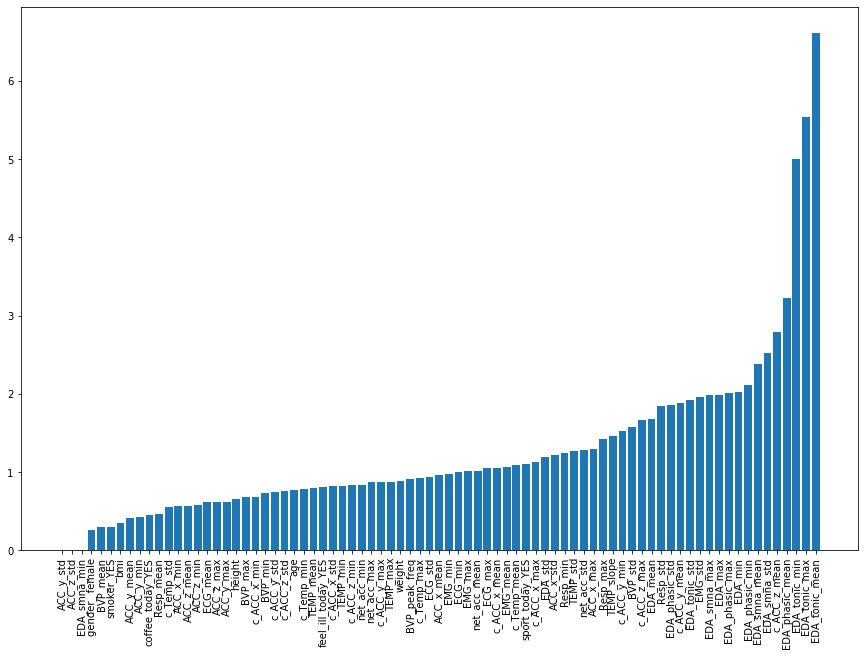

<Figure size 360x1080 with 0 Axes>

In [169]:
d=[]
for i in range(len(feature)):
     d.append([feature[i],list(et.feature_importances_)[i]*100])
d.sort(key=lambda x: x[1])


names = []
values = []
for i in d:
    names.append(i[0])
    values.append(i[1])
plt.bar(names, values)
plt.xticks(rotation=90)
plt.figure(figsize=(5,15))
fig_size = plt.rcParams["figure.figsize"]
print ("Current size:", fig_size)
fig_size[0] = 15
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

In [174]:
imp_feature=[]
for i in d:
    imp_feature.append((i[0]))
print(len(imp_feature))
imp_feature

79


['ACC_y_std',
 'ACC_z_std',
 'EDA_smna_min',
 'gender_ female',
 'BVP_mean',
 'smoker_YES',
 'bmi',
 'ACC_y_mean',
 'ACC_y_min',
 'coffee_today_YES',
 'Resp_mean',
 'c_Temp_std',
 'ACC_x_min',
 'ACC_z_mean',
 'ACC_z_min',
 'ECG_mean',
 'ACC_z_max',
 'ACC_y_max',
 'height',
 'BVP_max',
 'c_ACC_x_min',
 'BVP_min',
 'c_ACC_y_std',
 'c_ACC_z_std',
 'age',
 'c_Temp_min',
 'TEMP_mean',
 'feel_ill_today_YES',
 'c_ACC_x_std',
 'TEMP_min',
 'c_ACC_z_min',
 'net_acc_min',
 'net_acc_max',
 'c_ACC_y_max',
 'TEMP_max',
 'weight',
 'BVP_peak_freq',
 'c_Temp_max',
 'ECG_std',
 'ACC_x_mean',
 'EMG_min',
 'ECG_min',
 'EMG_max',
 'net_acc_mean',
 'ECG_max',
 'c_ACC_x_mean',
 'EMG_mean',
 'c_Temp_mean',
 'sport_today_YES',
 'c_ACC_x_max',
 'EDA_std',
 'ACC_x_std',
 'Resp_min',
 'TEMP_std',
 'net_acc_std',
 'ACC_x_max',
 'Resp_max',
 'TEMP_slope',
 'c_ACC_y_min',
 'BVP_std',
 'c_ACC_z_max',
 'EDA_mean',
 'Resp_std',
 'EDA_phasic_std',
 'c_ACC_y_mean',
 'EDA_tonic_std',
 'EMG_std',
 'EDA_smna_max',
 'EDA_m

In [175]:
for i in range(len(imp_feature)):
    print(i+1)
    new_fea=[]
    new_fea=imp_feature[::-1][:i+1]#[i for i in feature if ('EDA'in i) or ('acc' in i)or ('std' in i)]
    print((new_fea))
    scaler = Normalizer()
    scaled_data_train = scaler.fit_transform(train[new_fea])
    scaled_data_test = scaler.transform(test[new_fea])


    et = ExtraTreesClassifier(n_estimators=100,n_jobs=10,random_state=56)
    et.fit(scaled_data_train,train['label'])
    y_pred=et.predict(scaled_data_test)
    print(classification_report(test['label'],y_pred))

1
['EDA_tonic_mean']


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       147
           1       0.80      0.76      0.78       161
           2       0.48      0.99      0.64       146

    accuracy                           0.59       454
   macro avg       0.43      0.58      0.48       454
weighted avg       0.44      0.59      0.49       454

2
['EDA_tonic_mean', 'EDA_tonic_max']
              precision    recall  f1-score   support

           0       0.40      0.50      0.45       147
           1       0.76      0.70      0.73       161
           2       0.51      0.43      0.47       146

    accuracy                           0.55       454
   macro avg       0.56      0.55      0.55       454
weighted avg       0.57      0.55      0.56       454

3
['EDA_tonic_mean', 'EDA_tonic_max', 'EDA_tonic_min']
              precision    recall  f1-score   support

           0       0.36      0.42      0.39       147
           1       0.75      0.68   

              precision    recall  f1-score   support

           0       0.62      0.45      0.52       147
           1       0.83      0.83      0.83       161
           2       0.59      0.76      0.67       146

    accuracy                           0.68       454
   macro avg       0.68      0.68      0.67       454
weighted avg       0.69      0.68      0.68       454

18
['EDA_tonic_mean', 'EDA_tonic_max', 'EDA_tonic_min', 'EDA_phasic_mean', 'c_ACC_z_mean', 'EDA_smna_std', 'EDA_smna_mean', 'EDA_phasic_min', 'EDA_min', 'EDA_phasic_max', 'EDA_max', 'EDA_smna_max', 'EMG_std', 'EDA_tonic_std', 'c_ACC_y_mean', 'EDA_phasic_std', 'Resp_std', 'EDA_mean']
              precision    recall  f1-score   support

           0       0.57      0.43      0.49       147
           1       0.80      0.82      0.81       161
           2       0.59      0.72      0.65       146

    accuracy                           0.66       454
   macro avg       0.65      0.66      0.65       454
weighted 

              precision    recall  f1-score   support

           0       0.85      0.43      0.57       147
           1       0.81      0.96      0.88       161
           2       0.65      0.84      0.73       146

    accuracy                           0.75       454
   macro avg       0.77      0.74      0.73       454
weighted avg       0.77      0.75      0.73       454

30
['EDA_tonic_mean', 'EDA_tonic_max', 'EDA_tonic_min', 'EDA_phasic_mean', 'c_ACC_z_mean', 'EDA_smna_std', 'EDA_smna_mean', 'EDA_phasic_min', 'EDA_min', 'EDA_phasic_max', 'EDA_max', 'EDA_smna_max', 'EMG_std', 'EDA_tonic_std', 'c_ACC_y_mean', 'EDA_phasic_std', 'Resp_std', 'EDA_mean', 'c_ACC_z_max', 'BVP_std', 'c_ACC_y_min', 'TEMP_slope', 'Resp_max', 'ACC_x_max', 'net_acc_std', 'TEMP_std', 'Resp_min', 'ACC_x_std', 'EDA_std', 'c_ACC_x_max']
              precision    recall  f1-score   support

           0       0.88      0.52      0.65       147
           1       0.84      0.93      0.88       161
           2  

              precision    recall  f1-score   support

           0       0.87      0.59      0.70       147
           1       0.83      0.93      0.87       161
           2       0.74      0.88      0.80       146

    accuracy                           0.80       454
   macro avg       0.81      0.80      0.79       454
weighted avg       0.81      0.80      0.80       454

40
['EDA_tonic_mean', 'EDA_tonic_max', 'EDA_tonic_min', 'EDA_phasic_mean', 'c_ACC_z_mean', 'EDA_smna_std', 'EDA_smna_mean', 'EDA_phasic_min', 'EDA_min', 'EDA_phasic_max', 'EDA_max', 'EDA_smna_max', 'EMG_std', 'EDA_tonic_std', 'c_ACC_y_mean', 'EDA_phasic_std', 'Resp_std', 'EDA_mean', 'c_ACC_z_max', 'BVP_std', 'c_ACC_y_min', 'TEMP_slope', 'Resp_max', 'ACC_x_max', 'net_acc_std', 'TEMP_std', 'Resp_min', 'ACC_x_std', 'EDA_std', 'c_ACC_x_max', 'sport_today_YES', 'c_Temp_mean', 'EMG_mean', 'c_ACC_x_mean', 'ECG_max', 'net_acc_mean', 'EMG_max', 'ECG_min', 'EMG_min', 'ACC_x_mean']
              precision    recall  f1-sco

              precision    recall  f1-score   support

           0       1.00      0.55      0.71       147
           1       0.84      0.94      0.89       161
           2       0.70      0.92      0.80       146

    accuracy                           0.81       454
   macro avg       0.85      0.80      0.80       454
weighted avg       0.85      0.81      0.80       454

49
['EDA_tonic_mean', 'EDA_tonic_max', 'EDA_tonic_min', 'EDA_phasic_mean', 'c_ACC_z_mean', 'EDA_smna_std', 'EDA_smna_mean', 'EDA_phasic_min', 'EDA_min', 'EDA_phasic_max', 'EDA_max', 'EDA_smna_max', 'EMG_std', 'EDA_tonic_std', 'c_ACC_y_mean', 'EDA_phasic_std', 'Resp_std', 'EDA_mean', 'c_ACC_z_max', 'BVP_std', 'c_ACC_y_min', 'TEMP_slope', 'Resp_max', 'ACC_x_max', 'net_acc_std', 'TEMP_std', 'Resp_min', 'ACC_x_std', 'EDA_std', 'c_ACC_x_max', 'sport_today_YES', 'c_Temp_mean', 'EMG_mean', 'c_ACC_x_mean', 'ECG_max', 'net_acc_mean', 'EMG_max', 'ECG_min', 'EMG_min', 'ACC_x_mean', 'ECG_std', 'c_Temp_max', 'BVP_peak_freq',

              precision    recall  f1-score   support

           0       0.91      0.54      0.68       147
           1       0.86      0.86      0.86       161
           2       0.67      0.94      0.78       146

    accuracy                           0.78       454
   macro avg       0.81      0.78      0.77       454
weighted avg       0.81      0.78      0.78       454

57
['EDA_tonic_mean', 'EDA_tonic_max', 'EDA_tonic_min', 'EDA_phasic_mean', 'c_ACC_z_mean', 'EDA_smna_std', 'EDA_smna_mean', 'EDA_phasic_min', 'EDA_min', 'EDA_phasic_max', 'EDA_max', 'EDA_smna_max', 'EMG_std', 'EDA_tonic_std', 'c_ACC_y_mean', 'EDA_phasic_std', 'Resp_std', 'EDA_mean', 'c_ACC_z_max', 'BVP_std', 'c_ACC_y_min', 'TEMP_slope', 'Resp_max', 'ACC_x_max', 'net_acc_std', 'TEMP_std', 'Resp_min', 'ACC_x_std', 'EDA_std', 'c_ACC_x_max', 'sport_today_YES', 'c_Temp_mean', 'EMG_mean', 'c_ACC_x_mean', 'ECG_max', 'net_acc_mean', 'EMG_max', 'ECG_min', 'EMG_min', 'ACC_x_mean', 'ECG_std', 'c_Temp_max', 'BVP_peak_freq',

              precision    recall  f1-score   support

           0       0.79      0.59      0.68       147
           1       0.89      0.90      0.90       161
           2       0.72      0.90      0.80       146

    accuracy                           0.80       454
   macro avg       0.80      0.80      0.79       454
weighted avg       0.80      0.80      0.79       454

64
['EDA_tonic_mean', 'EDA_tonic_max', 'EDA_tonic_min', 'EDA_phasic_mean', 'c_ACC_z_mean', 'EDA_smna_std', 'EDA_smna_mean', 'EDA_phasic_min', 'EDA_min', 'EDA_phasic_max', 'EDA_max', 'EDA_smna_max', 'EMG_std', 'EDA_tonic_std', 'c_ACC_y_mean', 'EDA_phasic_std', 'Resp_std', 'EDA_mean', 'c_ACC_z_max', 'BVP_std', 'c_ACC_y_min', 'TEMP_slope', 'Resp_max', 'ACC_x_max', 'net_acc_std', 'TEMP_std', 'Resp_min', 'ACC_x_std', 'EDA_std', 'c_ACC_x_max', 'sport_today_YES', 'c_Temp_mean', 'EMG_mean', 'c_ACC_x_mean', 'ECG_max', 'net_acc_mean', 'EMG_max', 'ECG_min', 'EMG_min', 'ACC_x_mean', 'ECG_std', 'c_Temp_max', 'BVP_peak_freq',

              precision    recall  f1-score   support

           0       0.85      0.64      0.73       147
           1       0.91      0.91      0.91       161
           2       0.74      0.92      0.82       146

    accuracy                           0.83       454
   macro avg       0.83      0.82      0.82       454
weighted avg       0.83      0.83      0.82       454

71
['EDA_tonic_mean', 'EDA_tonic_max', 'EDA_tonic_min', 'EDA_phasic_mean', 'c_ACC_z_mean', 'EDA_smna_std', 'EDA_smna_mean', 'EDA_phasic_min', 'EDA_min', 'EDA_phasic_max', 'EDA_max', 'EDA_smna_max', 'EMG_std', 'EDA_tonic_std', 'c_ACC_y_mean', 'EDA_phasic_std', 'Resp_std', 'EDA_mean', 'c_ACC_z_max', 'BVP_std', 'c_ACC_y_min', 'TEMP_slope', 'Resp_max', 'ACC_x_max', 'net_acc_std', 'TEMP_std', 'Resp_min', 'ACC_x_std', 'EDA_std', 'c_ACC_x_max', 'sport_today_YES', 'c_Temp_mean', 'EMG_mean', 'c_ACC_x_mean', 'ECG_max', 'net_acc_mean', 'EMG_max', 'ECG_min', 'EMG_min', 'ACC_x_mean', 'ECG_std', 'c_Temp_max', 'BVP_peak_freq',

              precision    recall  f1-score   support

           0       0.83      0.65      0.73       147
           1       0.86      0.93      0.90       161
           2       0.76      0.85      0.80       146

    accuracy                           0.81       454
   macro avg       0.82      0.81      0.81       454
weighted avg       0.82      0.81      0.81       454

77
['EDA_tonic_mean', 'EDA_tonic_max', 'EDA_tonic_min', 'EDA_phasic_mean', 'c_ACC_z_mean', 'EDA_smna_std', 'EDA_smna_mean', 'EDA_phasic_min', 'EDA_min', 'EDA_phasic_max', 'EDA_max', 'EDA_smna_max', 'EMG_std', 'EDA_tonic_std', 'c_ACC_y_mean', 'EDA_phasic_std', 'Resp_std', 'EDA_mean', 'c_ACC_z_max', 'BVP_std', 'c_ACC_y_min', 'TEMP_slope', 'Resp_max', 'ACC_x_max', 'net_acc_std', 'TEMP_std', 'Resp_min', 'ACC_x_std', 'EDA_std', 'c_ACC_x_max', 'sport_today_YES', 'c_Temp_mean', 'EMG_mean', 'c_ACC_x_mean', 'ECG_max', 'net_acc_mean', 'EMG_max', 'ECG_min', 'EMG_min', 'ACC_x_mean', 'ECG_std', 'c_Temp_max', 'BVP_peak_freq',

In [178]:
#59-524-87
new_fea=[]
new_fea=imp_feature[::-1][:41]#[i for i in feature if ('EDA'in i) or ('acc' in i)or ('std' in i)]
#print((new_fea))
scaler = Normalizer()
scaled_data_train = scaler.fit_transform(train[new_fea])
scaled_data_test = scaler.transform(test[new_fea])


et = ExtraTreesClassifier(n_estimators=100,n_jobs=10,random_state=56)
et.fit(scaled_data_train,train['label'])
y_pred=et.predict(scaled_data_test)
print(classification_report(test['label'],y_pred))

for i in range (1000):
    et = ExtraTreesClassifier(n_estimators=100,n_jobs=10,random_state=i)
    et.fit(scaled_data_train,train['label'])
    y_pred=et.predict(scaled_data_test)
    if (classification_report(test['label'],y_pred,output_dict=True)['accuracy']>=.85):
        print (i)
        print(classification_report(test['label'],y_pred))

              precision    recall  f1-score   support

           0       0.82      0.64      0.72       147
           1       0.88      0.92      0.90       161
           2       0.75      0.88      0.81       146

    accuracy                           0.82       454
   macro avg       0.82      0.81      0.81       454
weighted avg       0.82      0.82      0.81       454



## 2 class

In [189]:
df=pd.read_csv('60s_window_wrist_chest.csv',index_col=0)
df=df[df['label']<2]
print(df['label'].unique())

features=df.columns.tolist()
features

removed = ['label']
for rem in removed:
    features.remove(rem)

features_with_sub=[]
features_with_sub[:]=features
removed = ['subject']
for rem in removed:
    features.remove(rem)

feature=features
print(len(feature))
len(features_with_sub)


sm = SMOTE(random_state=2)
X, y= sm.fit_sample(df[features_with_sub], df['label'])
df_new=pd.concat([pd.DataFrame(X,columns=features_with_sub),pd.DataFrame(y,columns=['label'])],axis=1)
df_new

for i in range (len(list(df_new['subject']))):
    df_new['subject'][i] = min([2,3,4,5,6,7,8,9,10,11,13,14,15,16,17], key=lambda x:abs(x-df_new['subject'][i]))
df_new['subject']=df_new['subject'].astype(int)

p_d=pd.read_csv('personal_detail.csv',index_col=0)

df_new_1=df_new.merge(p_d,on='subject')
df_new_1

features=df_new_1.columns.tolist()
features

removed = ['label']
for rem in removed:
    features.remove(rem)
features_with_sub=[]
features_with_sub[:]=features
removed = ['subject']
for rem in removed:
    features.remove(rem)

feature=features
print(len(feature))
len(features_with_sub)

[0 1]
70
79


/home/sf/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


80

In [190]:
train=df_new_1[df_new_1['subject']<=9]
test=df_new_1[df_new_1['subject']>9]


et = ExtraTreesClassifier(n_estimators=50,n_jobs=10,random_state=70 ,)
et.fit(train[feature],train['label'])
y_pred=et.predict(test[feature])
print(classification_report(test['label'],y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       147
           1       0.96      0.98      0.97       161

    accuracy                           0.96       308
   macro avg       0.96      0.96      0.96       308
weighted avg       0.96      0.96      0.96       308



Current size: [15.0, 10.0]


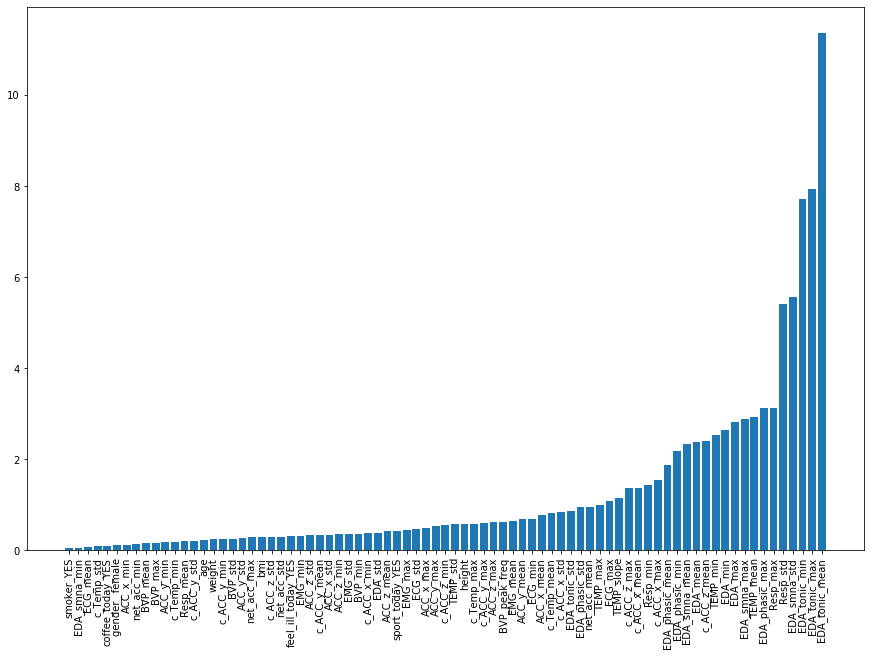

<Figure size 360x1080 with 0 Axes>

In [183]:
d=[]
for i in range(len(feature)):
     d.append([feature[i],list(et.feature_importances_)[i]*100])
d.sort(key=lambda x: x[1])


names = []
values = []
for i in d:
    names.append(i[0])
    values.append(i[1])
plt.bar(names, values)
plt.xticks(rotation=90)
plt.figure(figsize=(5,15))
fig_size = plt.rcParams["figure.figsize"]
print ("Current size:", fig_size)
fig_size[0] = 15
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

In [184]:
imp_feature=[]
for i in d:
    imp_feature.append((i[0]))
print(len(imp_feature))
imp_feature

79


['smoker_YES',
 'EDA_smna_min',
 'ECG_mean',
 'c_Temp_std',
 'coffee_today_YES',
 'gender_ female',
 'ACC_x_min',
 'net_acc_min',
 'BVP_mean',
 'BVP_max',
 'ACC_y_min',
 'c_Temp_min',
 'Resp_mean',
 'c_ACC_y_std',
 'age',
 'weight',
 'c_ACC_y_min',
 'BVP_std',
 'ACC_y_std',
 'net_acc_max',
 'bmi',
 'c_ACC_z_std',
 'net_acc_std',
 'feel_ill_today_YES',
 'EMG_min',
 'ACC_z_std',
 'c_ACC_y_mean',
 'ACC_x_std',
 'ACC_z_min',
 'EMG_std',
 'BVP_min',
 'c_ACC_x_min',
 'EDA_std',
 'ACC_z_mean',
 'sport_today_YES',
 'EMG_max',
 'ECG_std',
 'ACC_x_max',
 'ACC_y_max',
 'c_ACC_z_min',
 'TEMP_std',
 'height',
 'c_Temp_max',
 'c_ACC_y_max',
 'ACC_z_max',
 'BVP_peak_freq',
 'EMG_mean',
 'ACC_y_mean',
 'ECG_min',
 'ACC_x_mean',
 'c_Temp_mean',
 'c_ACC_x_std',
 'EDA_tonic_std',
 'EDA_phasic_std',
 'net_acc_mean',
 'TEMP_max',
 'ECG_max',
 'TEMP_slope',
 'c_ACC_z_max',
 'c_ACC_x_mean',
 'Resp_min',
 'c_ACC_x_max',
 'EDA_phasic_mean',
 'EDA_phasic_min',
 'EDA_smna_mean',
 'EDA_mean',
 'c_ACC_z_mean',
 'T

In [186]:
for i in range(len(imp_feature)):
    print(i+1)
    new_fea=[]
    new_fea=imp_feature[::-1][:i+1]#[i for i in feature if ('EDA'in i) or ('acc' in i)or ('std' in i)]
    print((new_fea))


    et = ExtraTreesClassifier(n_estimators=50,n_jobs=10,random_state=70)
    et.fit(train[new_fea],train['label'])
    y_pred=et.predict(test[new_fea])
    print(classification_report(test['label'],y_pred))

1
['EDA_tonic_mean']
              precision    recall  f1-score   support

           0       0.71      0.83      0.76       147
           1       0.81      0.68      0.74       161

    accuracy                           0.75       308
   macro avg       0.76      0.76      0.75       308
weighted avg       0.76      0.75      0.75       308

2
['EDA_tonic_mean', 'EDA_tonic_max']
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       147
           1       0.86      0.75      0.80       161

    accuracy                           0.81       308
   macro avg       0.81      0.81      0.81       308
weighted avg       0.81      0.81      0.80       308

3
['EDA_tonic_mean', 'EDA_tonic_max', 'EDA_tonic_min']
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       147
           1       0.87      0.74      0.80       161

    accuracy                           0.81       308
   macro avg  

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       147
           1       0.90      0.81      0.85       161

    accuracy                           0.85       308
   macro avg       0.85      0.85      0.85       308
weighted avg       0.86      0.85      0.85       308

20
['EDA_tonic_mean', 'EDA_tonic_max', 'EDA_tonic_min', 'EDA_smna_std', 'Resp_std', 'Resp_max', 'EDA_phasic_max', 'TEMP_mean', 'EDA_smna_max', 'EDA_max', 'EDA_min', 'TEMP_min', 'c_ACC_z_mean', 'EDA_mean', 'EDA_smna_mean', 'EDA_phasic_min', 'EDA_phasic_mean', 'c_ACC_x_max', 'Resp_min', 'c_ACC_x_mean']
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       147
           1       0.91      0.78      0.84       161

    accuracy                           0.84       308
   macro avg       0.85      0.84      0.84       308
weighted avg       0.85      0.84      0.84       308

21
['EDA_tonic_mean', 'EDA_tonic_max', 'EDA_

              precision    recall  f1-score   support

           0       0.83      0.97      0.89       147
           1       0.96      0.82      0.89       161

    accuracy                           0.89       308
   macro avg       0.90      0.89      0.89       308
weighted avg       0.90      0.89      0.89       308

32
['EDA_tonic_mean', 'EDA_tonic_max', 'EDA_tonic_min', 'EDA_smna_std', 'Resp_std', 'Resp_max', 'EDA_phasic_max', 'TEMP_mean', 'EDA_smna_max', 'EDA_max', 'EDA_min', 'TEMP_min', 'c_ACC_z_mean', 'EDA_mean', 'EDA_smna_mean', 'EDA_phasic_min', 'EDA_phasic_mean', 'c_ACC_x_max', 'Resp_min', 'c_ACC_x_mean', 'c_ACC_z_max', 'TEMP_slope', 'ECG_max', 'TEMP_max', 'net_acc_mean', 'EDA_phasic_std', 'EDA_tonic_std', 'c_ACC_x_std', 'c_Temp_mean', 'ACC_x_mean', 'ECG_min', 'ACC_y_mean']
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       147
           1       0.93      0.81      0.87       161

    accuracy                       

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       147
           1       0.97      0.83      0.90       161

    accuracy                           0.90       308
   macro avg       0.91      0.90      0.90       308
weighted avg       0.91      0.90      0.90       308

42
['EDA_tonic_mean', 'EDA_tonic_max', 'EDA_tonic_min', 'EDA_smna_std', 'Resp_std', 'Resp_max', 'EDA_phasic_max', 'TEMP_mean', 'EDA_smna_max', 'EDA_max', 'EDA_min', 'TEMP_min', 'c_ACC_z_mean', 'EDA_mean', 'EDA_smna_mean', 'EDA_phasic_min', 'EDA_phasic_mean', 'c_ACC_x_max', 'Resp_min', 'c_ACC_x_mean', 'c_ACC_z_max', 'TEMP_slope', 'ECG_max', 'TEMP_max', 'net_acc_mean', 'EDA_phasic_std', 'EDA_tonic_std', 'c_ACC_x_std', 'c_Temp_mean', 'ACC_x_mean', 'ECG_min', 'ACC_y_mean', 'EMG_mean', 'BVP_peak_freq', 'ACC_z_max', 'c_ACC_y_max', 'c_Temp_max', 'height', 'TEMP_std', 'c_ACC_z_min', 'ACC_y_max', 'ACC_x_max']
              precision    recall  f1-score   support

          

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       147
           1       0.95      0.83      0.88       161

    accuracy                           0.89       308
   macro avg       0.89      0.89      0.89       308
weighted avg       0.89      0.89      0.89       308

51
['EDA_tonic_mean', 'EDA_tonic_max', 'EDA_tonic_min', 'EDA_smna_std', 'Resp_std', 'Resp_max', 'EDA_phasic_max', 'TEMP_mean', 'EDA_smna_max', 'EDA_max', 'EDA_min', 'TEMP_min', 'c_ACC_z_mean', 'EDA_mean', 'EDA_smna_mean', 'EDA_phasic_min', 'EDA_phasic_mean', 'c_ACC_x_max', 'Resp_min', 'c_ACC_x_mean', 'c_ACC_z_max', 'TEMP_slope', 'ECG_max', 'TEMP_max', 'net_acc_mean', 'EDA_phasic_std', 'EDA_tonic_std', 'c_ACC_x_std', 'c_Temp_mean', 'ACC_x_mean', 'ECG_min', 'ACC_y_mean', 'EMG_mean', 'BVP_peak_freq', 'ACC_z_max', 'c_ACC_y_max', 'c_Temp_max', 'height', 'TEMP_std', 'c_ACC_z_min', 'ACC_y_max', 'ACC_x_max', 'ECG_std', 'EMG_max', 'sport_today_YES', 'ACC_z_mean', 'EDA_std',

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       147
           1       0.94      0.83      0.88       161

    accuracy                           0.88       308
   macro avg       0.89      0.89      0.88       308
weighted avg       0.89      0.88      0.88       308

59
['EDA_tonic_mean', 'EDA_tonic_max', 'EDA_tonic_min', 'EDA_smna_std', 'Resp_std', 'Resp_max', 'EDA_phasic_max', 'TEMP_mean', 'EDA_smna_max', 'EDA_max', 'EDA_min', 'TEMP_min', 'c_ACC_z_mean', 'EDA_mean', 'EDA_smna_mean', 'EDA_phasic_min', 'EDA_phasic_mean', 'c_ACC_x_max', 'Resp_min', 'c_ACC_x_mean', 'c_ACC_z_max', 'TEMP_slope', 'ECG_max', 'TEMP_max', 'net_acc_mean', 'EDA_phasic_std', 'EDA_tonic_std', 'c_ACC_x_std', 'c_Temp_mean', 'ACC_x_mean', 'ECG_min', 'ACC_y_mean', 'EMG_mean', 'BVP_peak_freq', 'ACC_z_max', 'c_ACC_y_max', 'c_Temp_max', 'height', 'TEMP_std', 'c_ACC_z_min', 'ACC_y_max', 'ACC_x_max', 'ECG_std', 'EMG_max', 'sport_today_YES', 'ACC_z_mean', 'EDA_std',

              precision    recall  f1-score   support

           0       0.88      0.97      0.93       147
           1       0.97      0.88      0.93       161

    accuracy                           0.93       308
   macro avg       0.93      0.93      0.93       308
weighted avg       0.93      0.93      0.93       308

66
['EDA_tonic_mean', 'EDA_tonic_max', 'EDA_tonic_min', 'EDA_smna_std', 'Resp_std', 'Resp_max', 'EDA_phasic_max', 'TEMP_mean', 'EDA_smna_max', 'EDA_max', 'EDA_min', 'TEMP_min', 'c_ACC_z_mean', 'EDA_mean', 'EDA_smna_mean', 'EDA_phasic_min', 'EDA_phasic_mean', 'c_ACC_x_max', 'Resp_min', 'c_ACC_x_mean', 'c_ACC_z_max', 'TEMP_slope', 'ECG_max', 'TEMP_max', 'net_acc_mean', 'EDA_phasic_std', 'EDA_tonic_std', 'c_ACC_x_std', 'c_Temp_mean', 'ACC_x_mean', 'ECG_min', 'ACC_y_mean', 'EMG_mean', 'BVP_peak_freq', 'ACC_z_max', 'c_ACC_y_max', 'c_Temp_max', 'height', 'TEMP_std', 'c_ACC_z_min', 'ACC_y_max', 'ACC_x_max', 'ECG_std', 'EMG_max', 'sport_today_YES', 'ACC_z_mean', 'EDA_std',

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       147
           1       0.96      0.89      0.92       161

    accuracy                           0.92       308
   macro avg       0.92      0.92      0.92       308
weighted avg       0.92      0.92      0.92       308

73
['EDA_tonic_mean', 'EDA_tonic_max', 'EDA_tonic_min', 'EDA_smna_std', 'Resp_std', 'Resp_max', 'EDA_phasic_max', 'TEMP_mean', 'EDA_smna_max', 'EDA_max', 'EDA_min', 'TEMP_min', 'c_ACC_z_mean', 'EDA_mean', 'EDA_smna_mean', 'EDA_phasic_min', 'EDA_phasic_mean', 'c_ACC_x_max', 'Resp_min', 'c_ACC_x_mean', 'c_ACC_z_max', 'TEMP_slope', 'ECG_max', 'TEMP_max', 'net_acc_mean', 'EDA_phasic_std', 'EDA_tonic_std', 'c_ACC_x_std', 'c_Temp_mean', 'ACC_x_mean', 'ECG_min', 'ACC_y_mean', 'EMG_mean', 'BVP_peak_freq', 'ACC_z_max', 'c_ACC_y_max', 'c_Temp_max', 'height', 'TEMP_std', 'c_ACC_z_min', 'ACC_y_max', 'ACC_x_max', 'ECG_std', 'EMG_max', 'sport_today_YES', 'ACC_z_mean', 'EDA_std',

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       147
           1       0.95      0.92      0.93       161

    accuracy                           0.93       308
   macro avg       0.93      0.93      0.93       308
weighted avg       0.93      0.93      0.93       308

79
['EDA_tonic_mean', 'EDA_tonic_max', 'EDA_tonic_min', 'EDA_smna_std', 'Resp_std', 'Resp_max', 'EDA_phasic_max', 'TEMP_mean', 'EDA_smna_max', 'EDA_max', 'EDA_min', 'TEMP_min', 'c_ACC_z_mean', 'EDA_mean', 'EDA_smna_mean', 'EDA_phasic_min', 'EDA_phasic_mean', 'c_ACC_x_max', 'Resp_min', 'c_ACC_x_mean', 'c_ACC_z_max', 'TEMP_slope', 'ECG_max', 'TEMP_max', 'net_acc_mean', 'EDA_phasic_std', 'EDA_tonic_std', 'c_ACC_x_std', 'c_Temp_mean', 'ACC_x_mean', 'ECG_min', 'ACC_y_mean', 'EMG_mean', 'BVP_peak_freq', 'ACC_z_max', 'c_ACC_y_max', 'c_Temp_max', 'height', 'TEMP_std', 'c_ACC_z_min', 'ACC_y_max', 'ACC_x_max', 'ECG_std', 'EMG_max', 'sport_today_YES', 'ACC_z_mean', 'EDA_std',

In [194]:
#49-645-.96
new_fea=[]
new_fea=imp_feature[::-1][:38]#[i for i in feature if ('EDA'in i) or ('acc' in i)or ('std' in i)]
#print((new_fea))


train=df_new_1[df_new_1['subject']<=9]
test=df_new_1[df_new_1['subject']>9]


et = ExtraTreesClassifier(n_estimators=50,n_jobs=10,random_state=70 ,)
et.fit(train[feature],train['label'])
y_pred=et.predict(test[feature])
print(classification_report(test['label'],y_pred))

for i in range (1000):
    et = ExtraTreesClassifier(n_estimators=50,n_jobs=10,random_state=i)
    et.fit(train[new_fea],train['label'])
    y_pred=et.predict(test[new_fea])
    if (classification_report(test['label'],y_pred,output_dict=True)['accuracy']>=.95):
        print (i)
        print(classification_report(test['label'],y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       147
           1       0.96      0.98      0.97       161

    accuracy                           0.96       308
   macro avg       0.96      0.96      0.96       308
weighted avg       0.96      0.96      0.96       308

